# Bike Rental Demand Forecasting

Bike Rental Demand Forecasting project huge and impactful. This project is a fantastic opportunity to showcase your skills in time-series analysis, feature engineering, and machine learning.

Predict the number of bikes rented per hour based on weather and time-based features to optimize bike availability and improve customer satisfaction.

Business Value:

Helps bike-sharing companies allocate resources efficiently.

Reduces operational costs by predicting demand accurately.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/siyal/Downloads/hour.csv')
data['dteday'] = pd.to_datetime(data['dteday'])

In [4]:
print(data.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [6]:
print(data.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [7]:
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print(data.drop_duplicates())

       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   a

Descriptive Statistics

In [9]:
summary_stats = data.describe()
print(summary_stats)

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

Analyze Trends

hr
16    730
17    730
15    729
14    729
13    729
12    728
18    728
19    728
20    728
21    728
22    728
23    728
8     727
9     727
10    727
7     727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


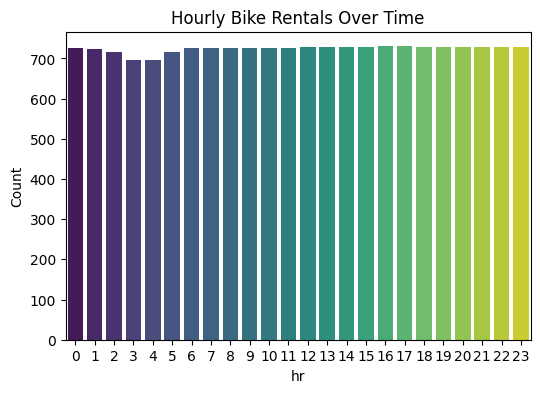

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
hr_counts = data['hr'].value_counts()
print(hr_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=hr_counts.index, y=hr_counts.values, palette="viridis")
plt.title('Hourly Bike Rentals Over Time')
plt.xlabel('hr')
plt.ylabel('Count')
plt.show()

Seasonal Trends:

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64


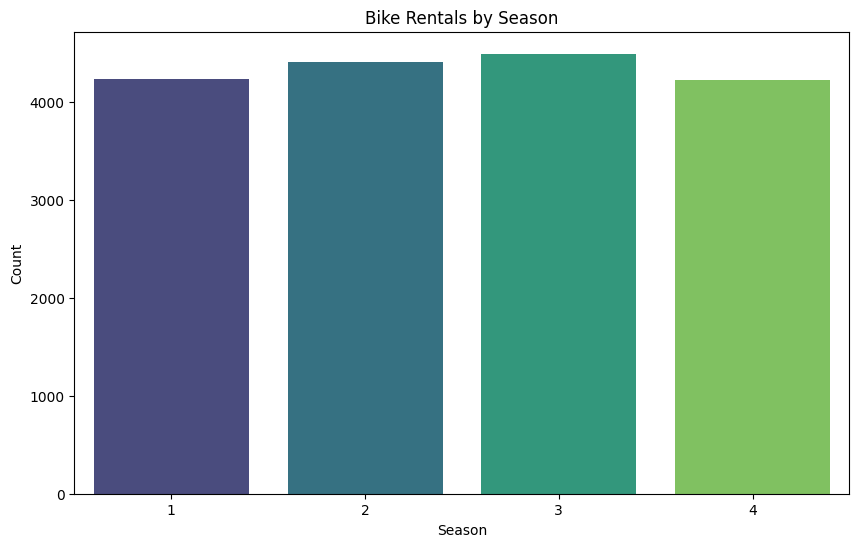

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bike Rentals by Season
season_counts = data['season'].value_counts()
print(season_counts)
# Plot rentals by season
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="viridis")
plt.title("Bike Rentals by Season")
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

Weather Impact:

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\3612708545.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='weathersit', multiple='stack', palette="viridis", kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


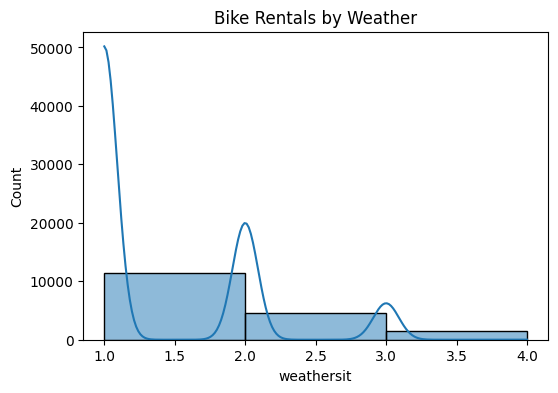

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
weathersit_counts = data['weathersit'].value_counts()
print(weathersit_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='weathersit', multiple='stack', palette="viridis", kde=True)
plt.title('Bike Rentals by Weather')
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.show()

Demand Based on Yearly Trends:

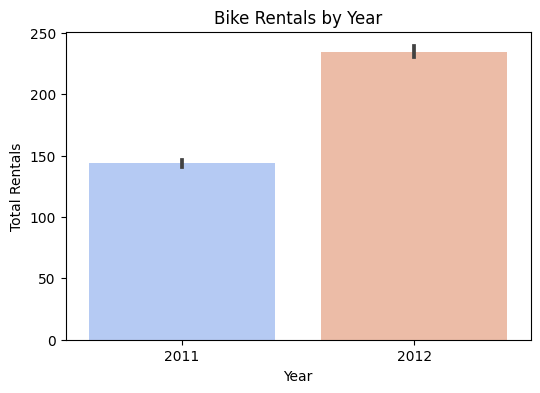

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x='yr', y='cnt', data=data, palette="coolwarm")
plt.xticks([0, 1], ['2011', '2012'])
plt.title('Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.show()

Monthly Demand Analysis: 

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\2938381871.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='mnth', y='cnt', data=data, marker="o", palette="Blues")
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


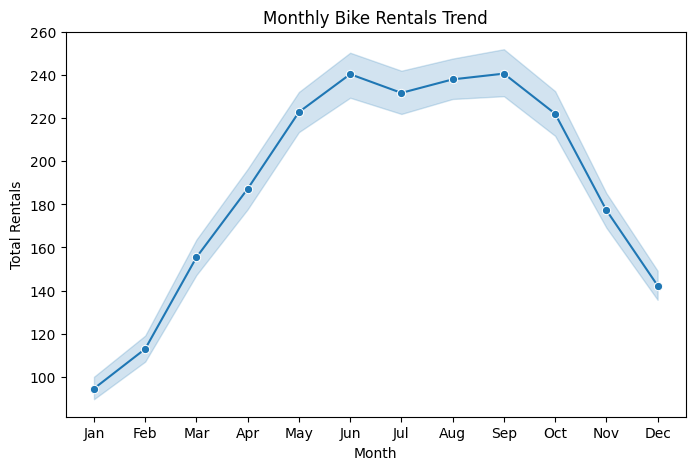

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.lineplot(x='mnth', y='cnt', data=data, marker="o", palette="Blues")
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.title('Monthly Bike Rentals Trend')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

Impact of Holidays and Working Days:

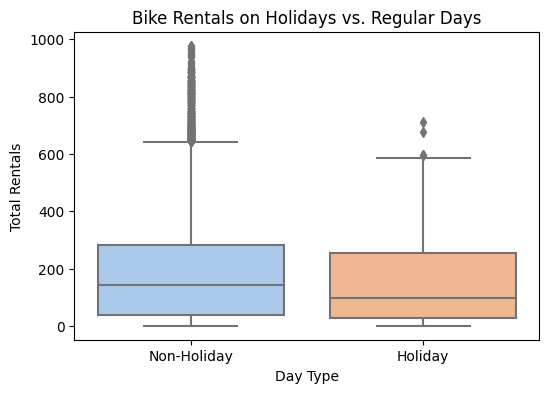

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=data, palette="pastel")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Bike Rentals on Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

Impact of Temperature and Humidity on Rentals:

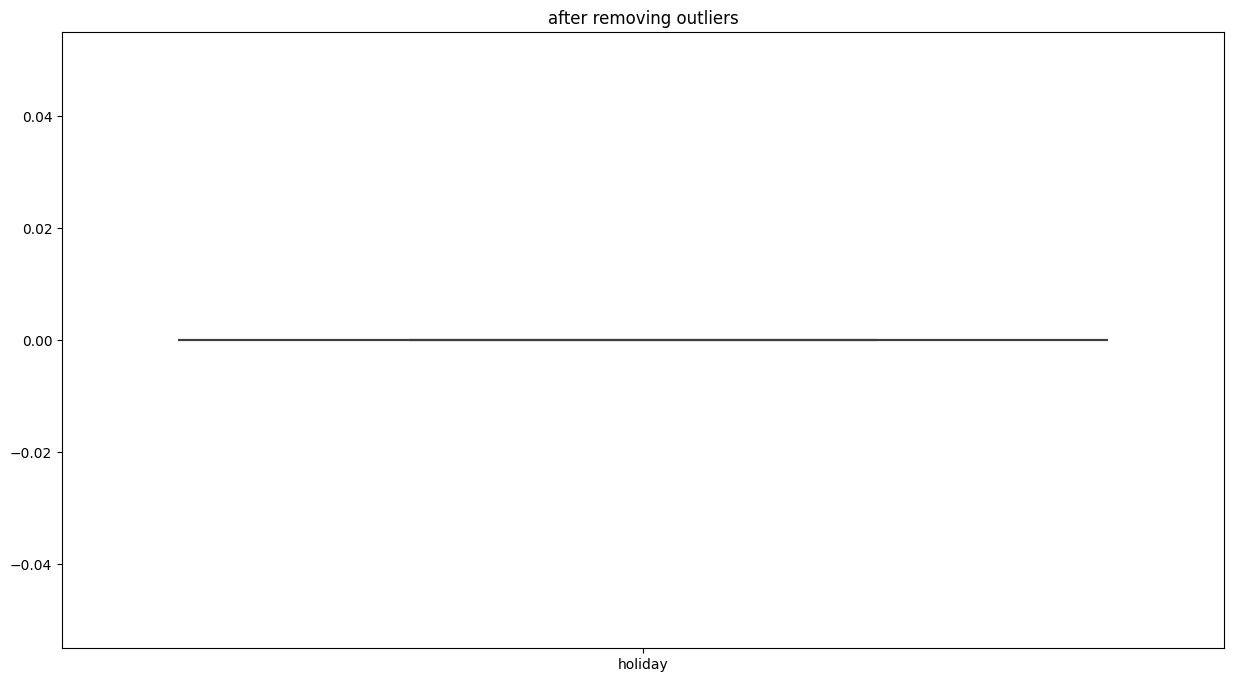

Rows in original dataset: 17379
Rows after removing outliers: 16879
Number of outliers removed: 500


In [17]:
# Calculate Q1, Q3 and IQR
Q1 = data['holiday'].quantile(0.25)
Q3 = data['holiday'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
data_clean = data[~((data['holiday'] < lower_bound) | (data['holiday'] > upper_bound))]

# Verify the results with a new boxplot
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_clean[['holiday']])
ax.set_title('after removing outliers')
plt.show()

# Print the number of rows removed
print(f"Rows in original dataset: {len(data)}")
print(f"Rows after removing outliers: {len(data_clean)}")
print(f"Number of outliers removed: {len(data) - len(data_clean)}")

C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


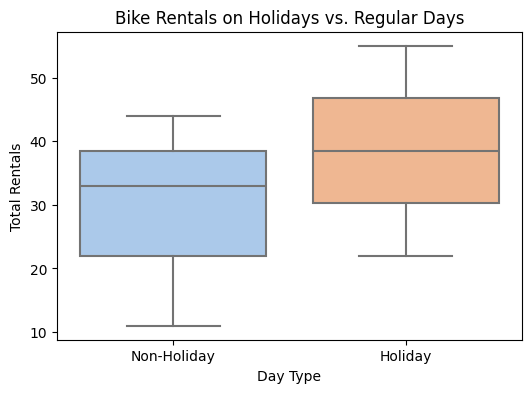

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=data, palette="pastel")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Bike Rentals on Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


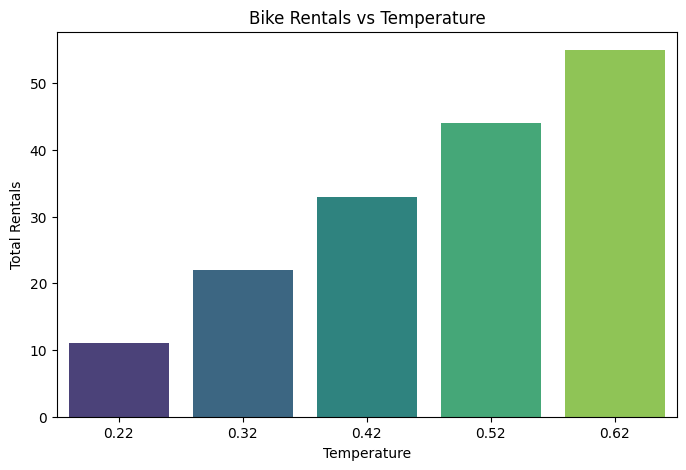

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='temp', y='cnt', data=data, palette="viridis")
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

Weekday Trends in Rentals

C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


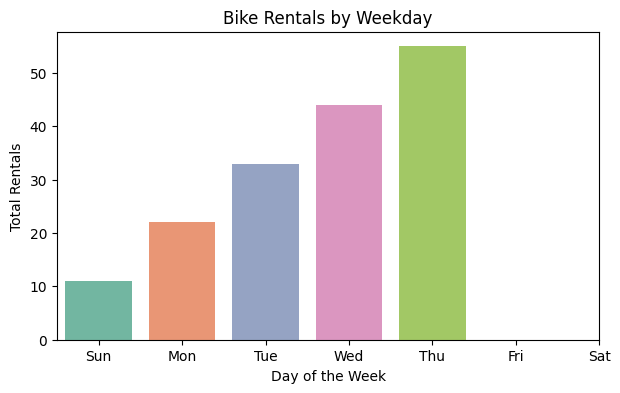

In [24]:
plt.figure(figsize=(7, 4))
sns.barplot(x='weekday', y='cnt', data=data, palette="Set2")
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title('Bike Rentals by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.show()

Registered vs. Casual Users Trend:

C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


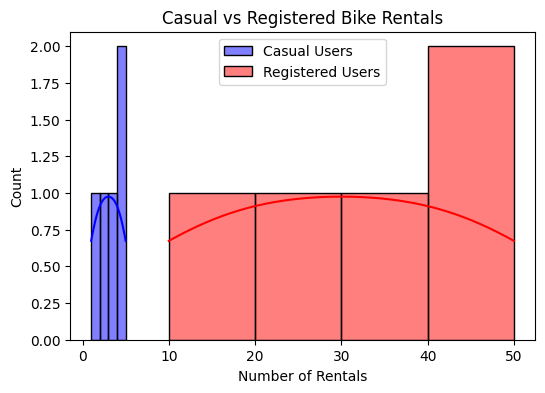

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='casual', color="blue", kde=True, label="Casual Users")
sns.histplot(data=data, x='registered', color="red", kde=True, label="Registered Users")
plt.title('Casual vs Registered Bike Rentals')
plt.xlabel('Number of Rentals')
plt.legend()
plt.show()

Outlier analysis:

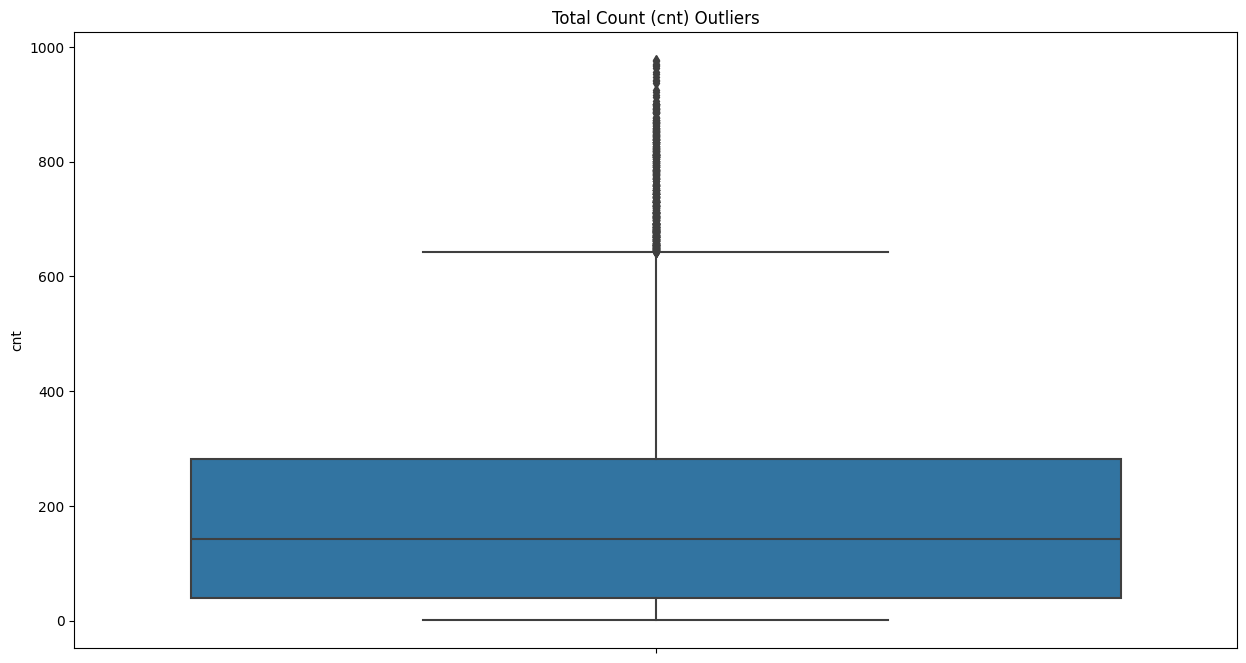

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
# Boxplot for 'cnt' column (total count)
sns.boxplot(y=data['cnt'], ax=ax)  
# Set title
ax.set_title('Total Count (cnt) Outliers')
# Show plot
plt.show()

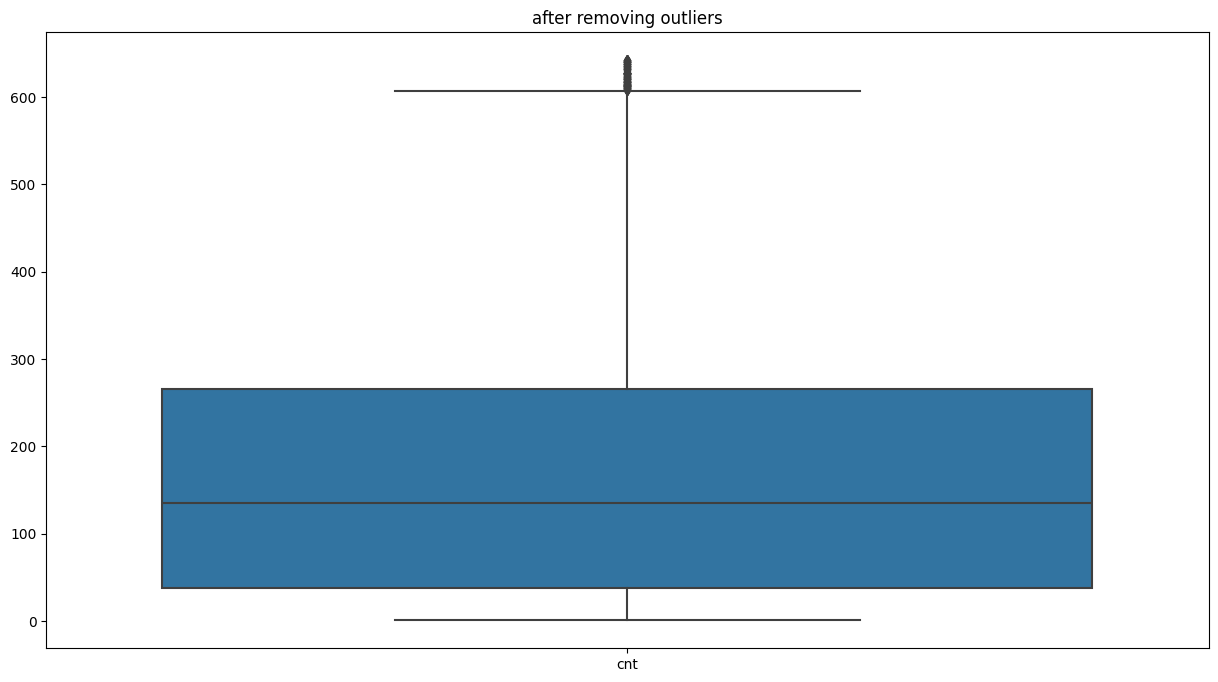

Rows in original dataset: 17379
Rows after removing outliers: 16874
Number of outliers removed: 505


In [59]:
# Calculate Q1, Q3 and IQR
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
data_clean = data[~((data['cnt'] < lower_bound) | (data['cnt'] > upper_bound))]

# Verify the results with a new boxplot
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_clean[['cnt']])
ax.set_title('after removing outliers')
plt.show()

# Print the number of rows removed
print(f"Rows in original dataset: {len(data)}")
print(f"Rows after removing outliers: {len(data_clean)}")
print(f"Number of outliers removed: {len(data) - len(data_clean)}")

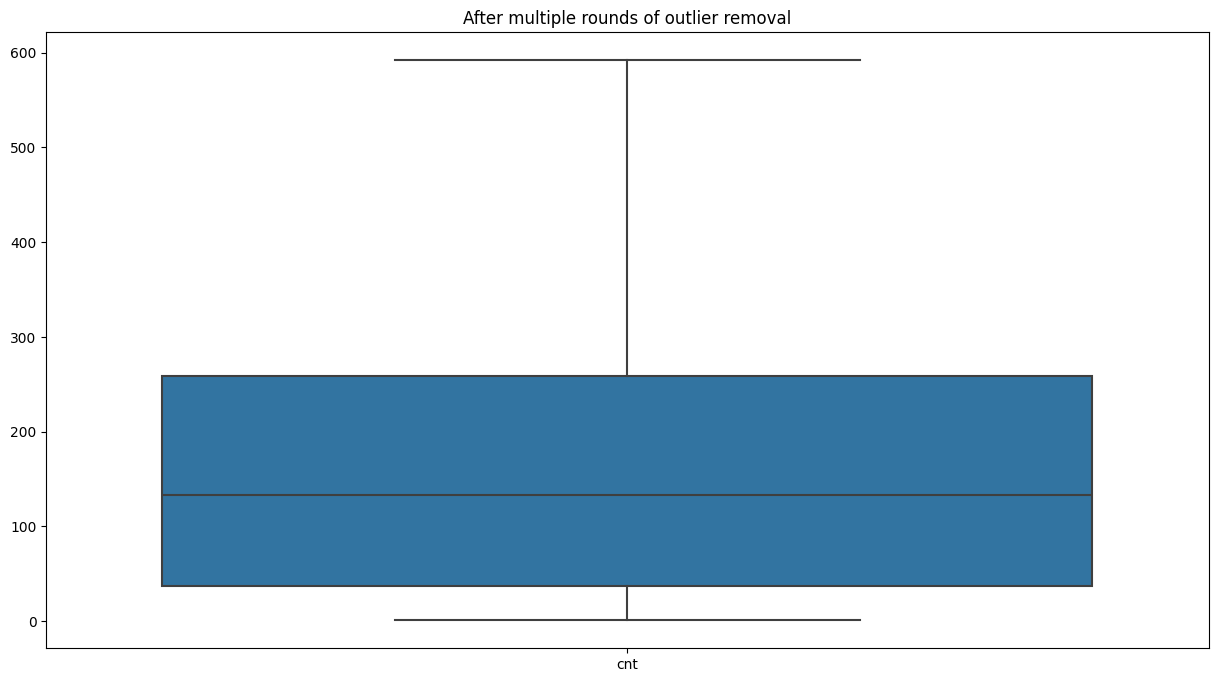

Rows in original dataset: 17379
Rows after removing all outliers: 16678
Total outliers removed: 701


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Repeated IQR filtering function
def remove_outliers_iqr(data, cnt):
    while True:
        # Calculate IQR
        Q1 = data[cnt].quantile(0.25)
        Q3 = data[cnt].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data_new = data[(data[cnt] >= lower_bound) & (data[cnt] <= upper_bound)]
        
        # Break loop if no more rows are removed
        if len(data) == len(data_new):
            break
        
        data = data_new  # Update dataset

    return data

# Apply multiple rounds of IQR filtering
data_clean = remove_outliers_iqr(data, 'cnt')

# Verify results
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_clean[['cnt']])
ax.set_title('After multiple rounds of outlier removal')
plt.show()

print(f"Rows in original dataset: {len(data)}")
print(f"Rows after removing all outliers: {len(data_clean)}")
print(f"Total outliers removed: {len(data) - len(data_clean)}")

✅ All required columns are present.
Original dataset rows: 17379
Cleaned dataset rows: 16874
Number of outliers removed: 505


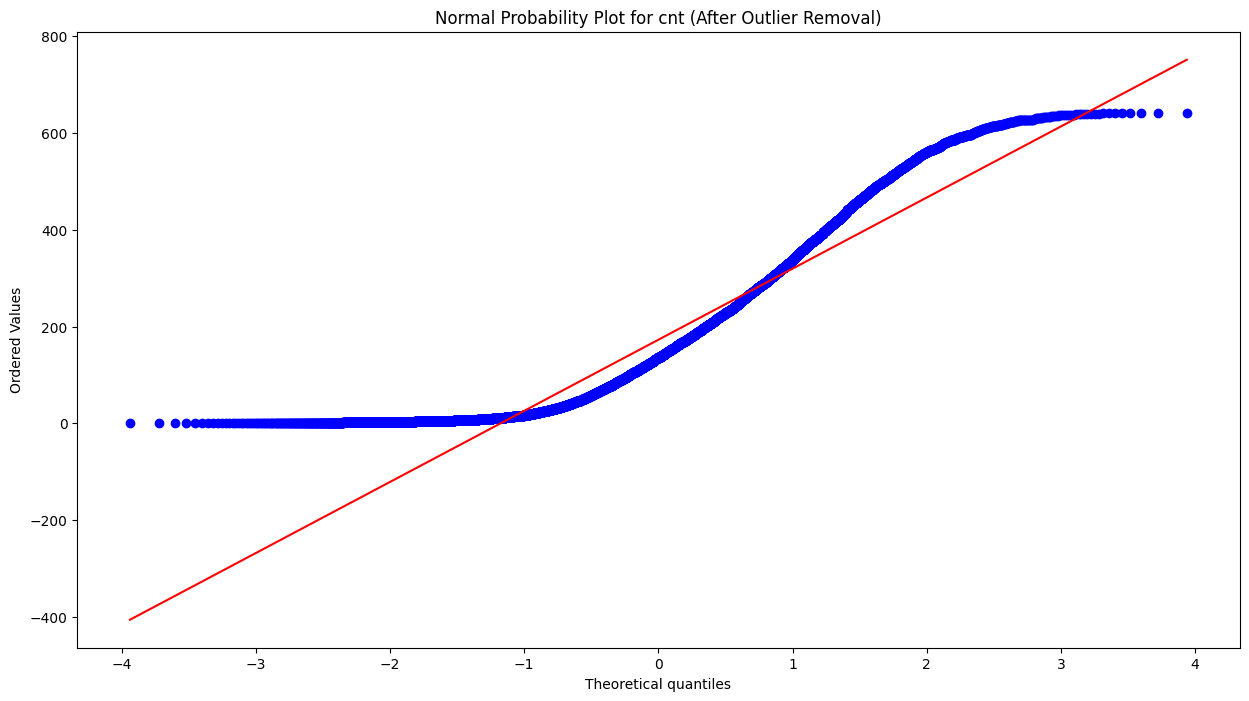

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load Data (Make sure it's a DataFrame)
data = pd.read_csv('C:/Users/siyal/Downloads/hour.csv')

# Convert 'dteday' to datetime (if needed)
if 'dteday' in data.columns:
    data['dteday'] = pd.to_datetime(data['dteday'])

# Check if all required columns exist
required_cols = [
    'instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
    'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
    'casual', 'registered', 'cnt'
]
missing_cols = [col for col in required_cols if col not in data.columns]

if missing_cols:
    print(f"⚠️ Missing columns in dataset: {missing_cols}")
else:
    print("✅ All required columns are present.")

# ---- 📌 Detect and Remove Outliers Using IQR ----
Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_clean = data[(data['cnt'] >= lower_bound) & (data['cnt'] <= upper_bound)]

# Print the number of rows removed
print(f"Original dataset rows: {len(data)}")
print(f"Cleaned dataset rows: {len(data_clean)}")
print(f"Number of outliers removed: {len(data) - len(data_clean)}")

# ---- 📌 Normal Probability Plot for 'cnt' (After Removing Outliers) ----
fig = plt.figure(figsize=(15, 8))
stats.probplot(data_clean['cnt'], dist='norm', plot=plt)  # Use cleaned data
plt.title('Normal Probability Plot for cnt (After Outlier Removal)')
plt.show()

Normal Probability Plot:

Correlation matrix:

In [89]:
print(data_clean.nunique())  # Check unique values per column

instant       16874
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          293
registered      598
cnt             640
dtype: int64


In [90]:
print(data_clean.isnull().sum())  # Check if any column has NaN

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [91]:
#dropping dataframe columns which really doesn't matter for prediction
columnsToDrop= ['instant', 'casual', 'registered', 'atemp', 'dteday']
data_clean.drop(columnsToDrop, axis=1, inplace=True)
correMtr = data_clean_corr.corr()

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\4022664761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(columnsToDrop, axis=1, inplace=True)


C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


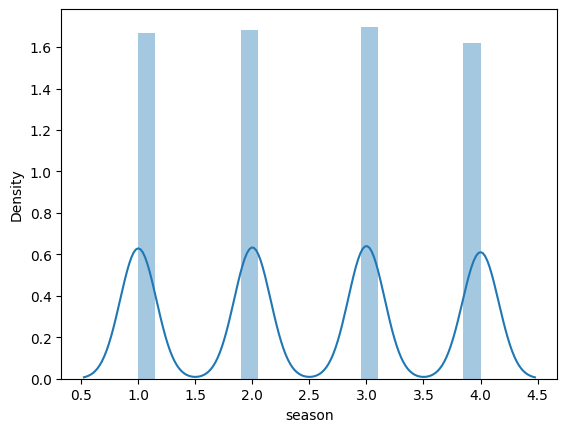

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


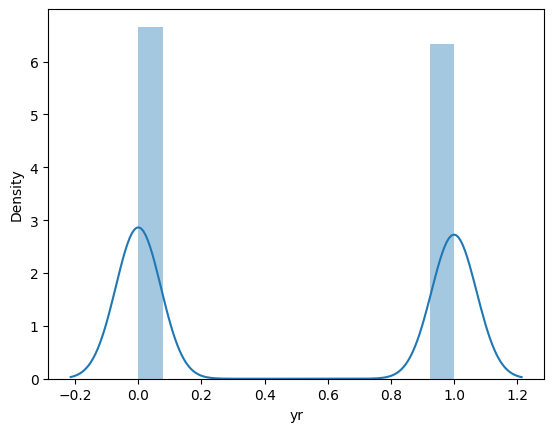

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


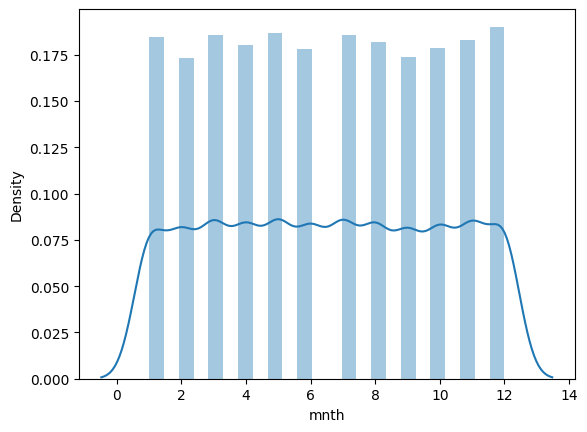

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


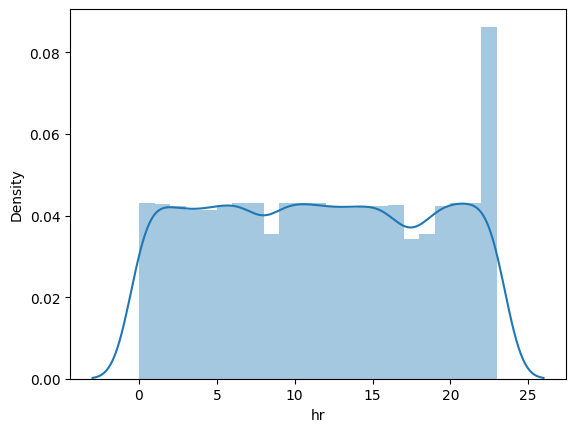

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


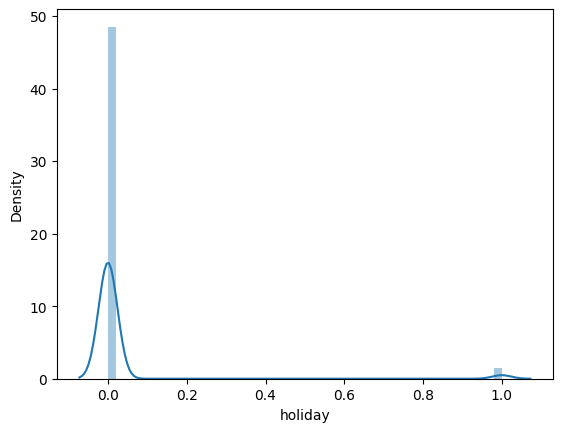

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


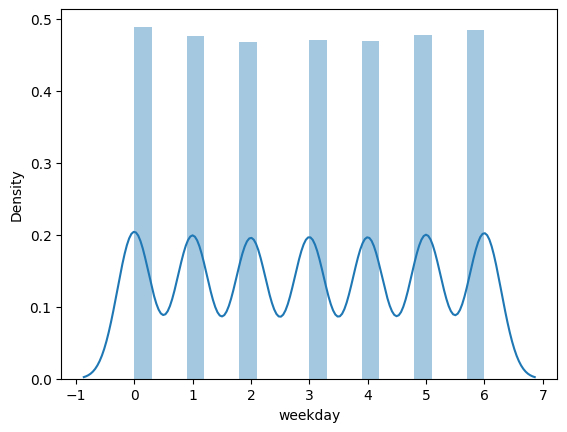

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


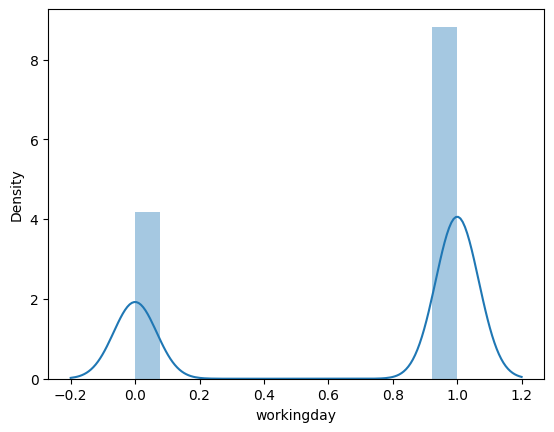

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


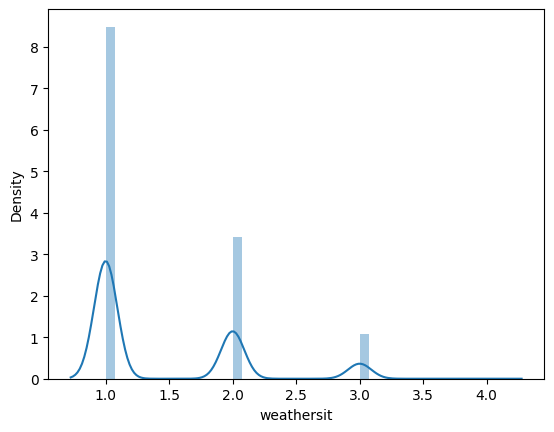

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


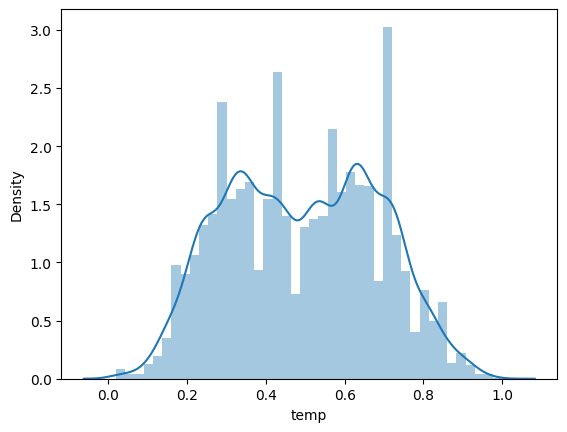

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


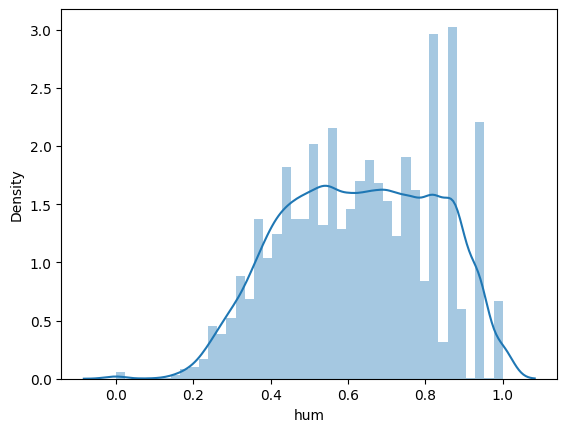

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


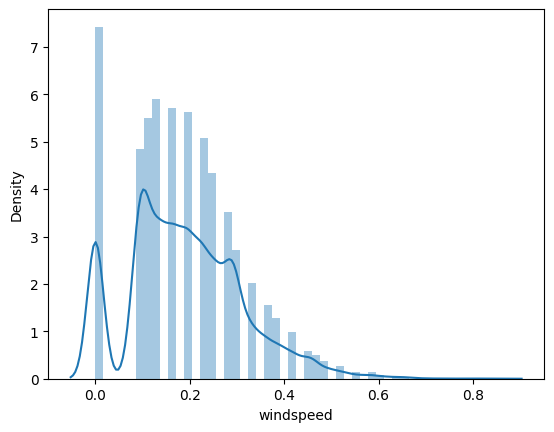

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\64378476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean[x], kde=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


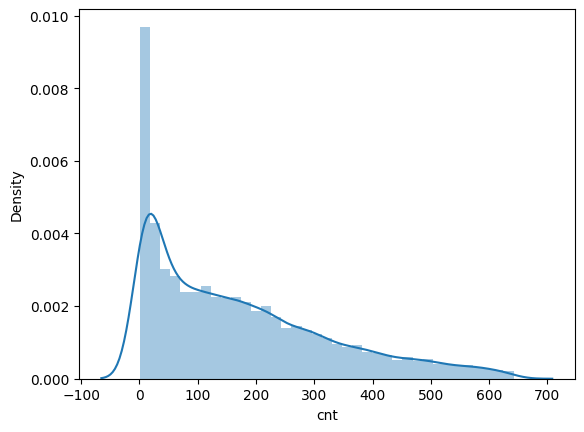

In [92]:
columns = data_clean.columns
for x in columns:
    sns.distplot(data_clean[x], kde=True)
    plt.show()

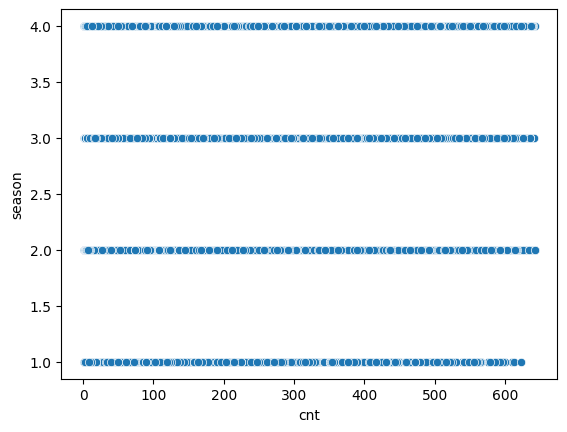

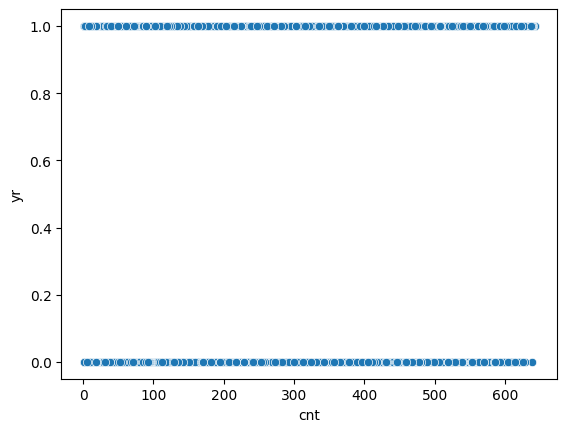

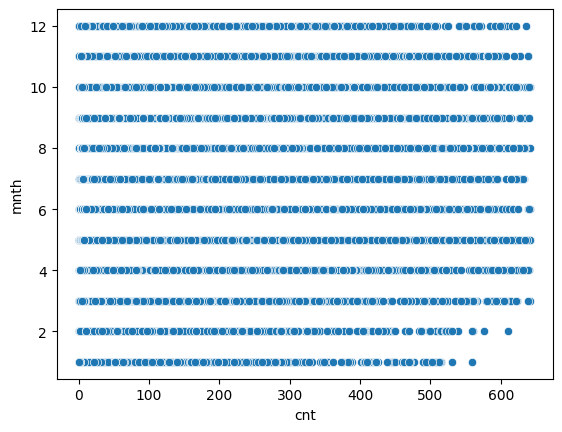

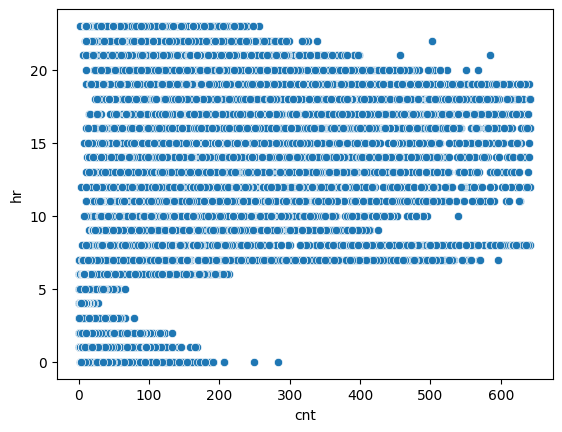

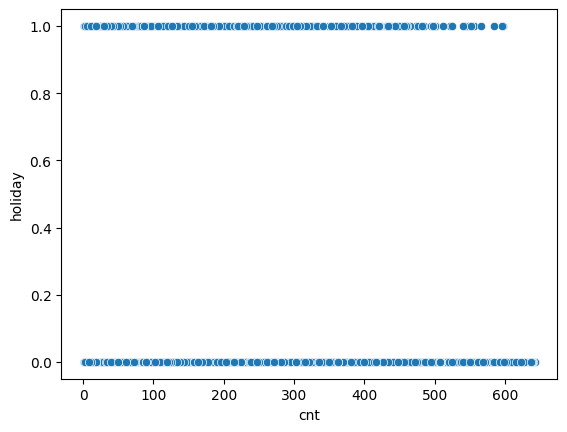

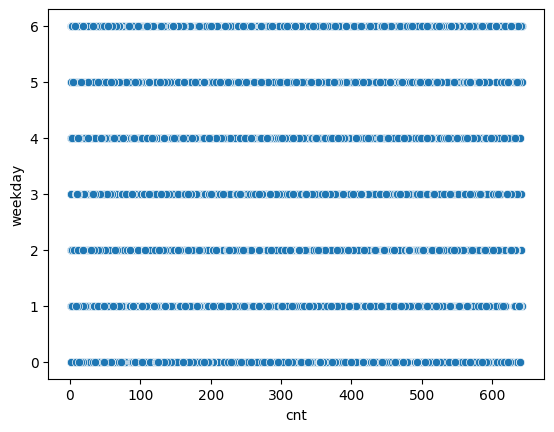

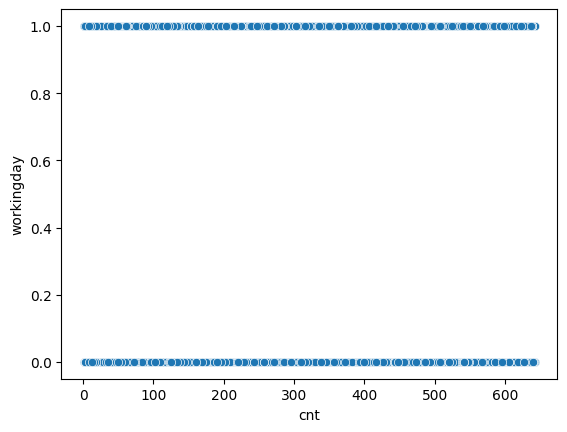

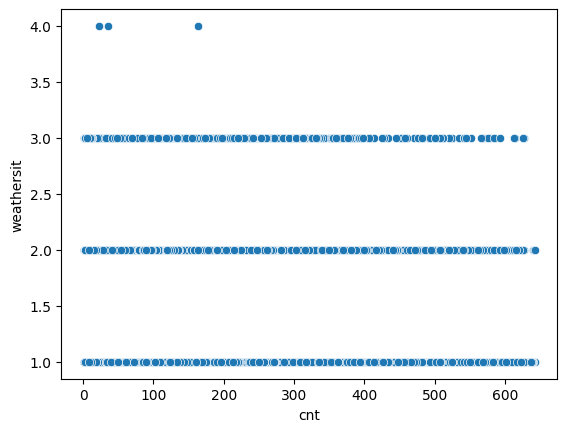

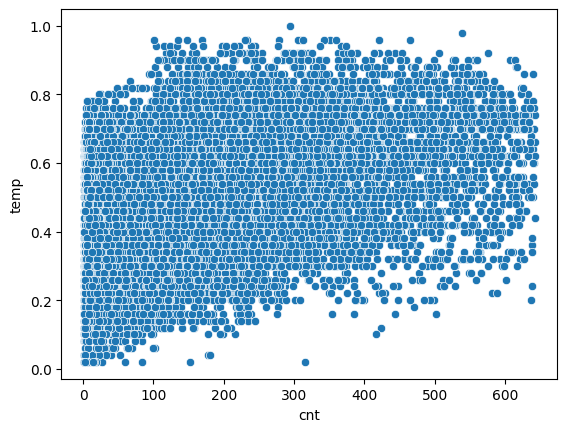

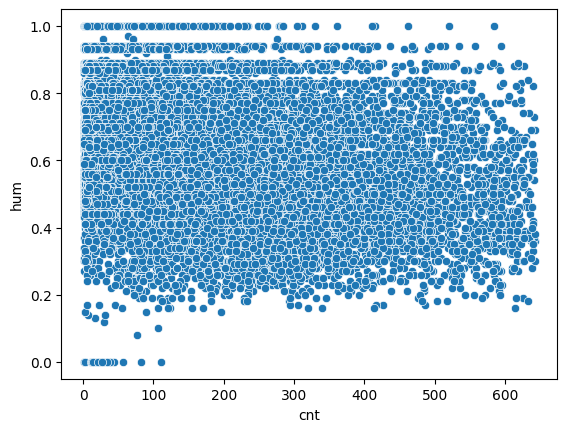

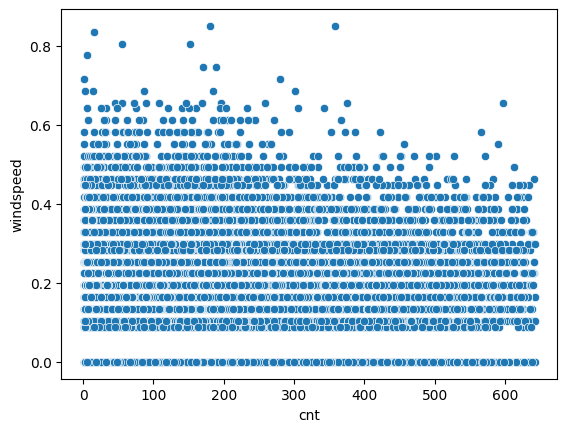

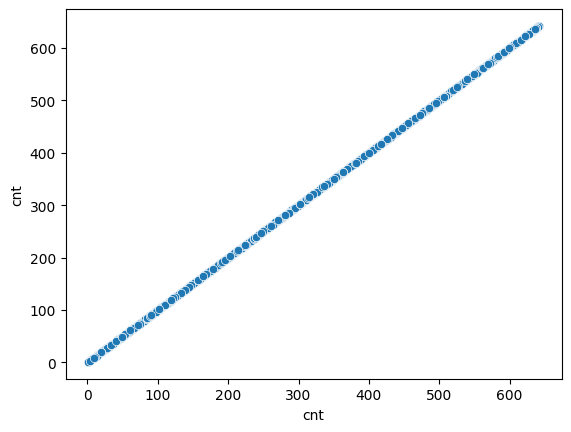

In [93]:
# visualizing relationship of variables with 'cnt'
for y in columns:
    sns.scatterplot(x='cnt', y=y, data= data_clean)
    plt.show()

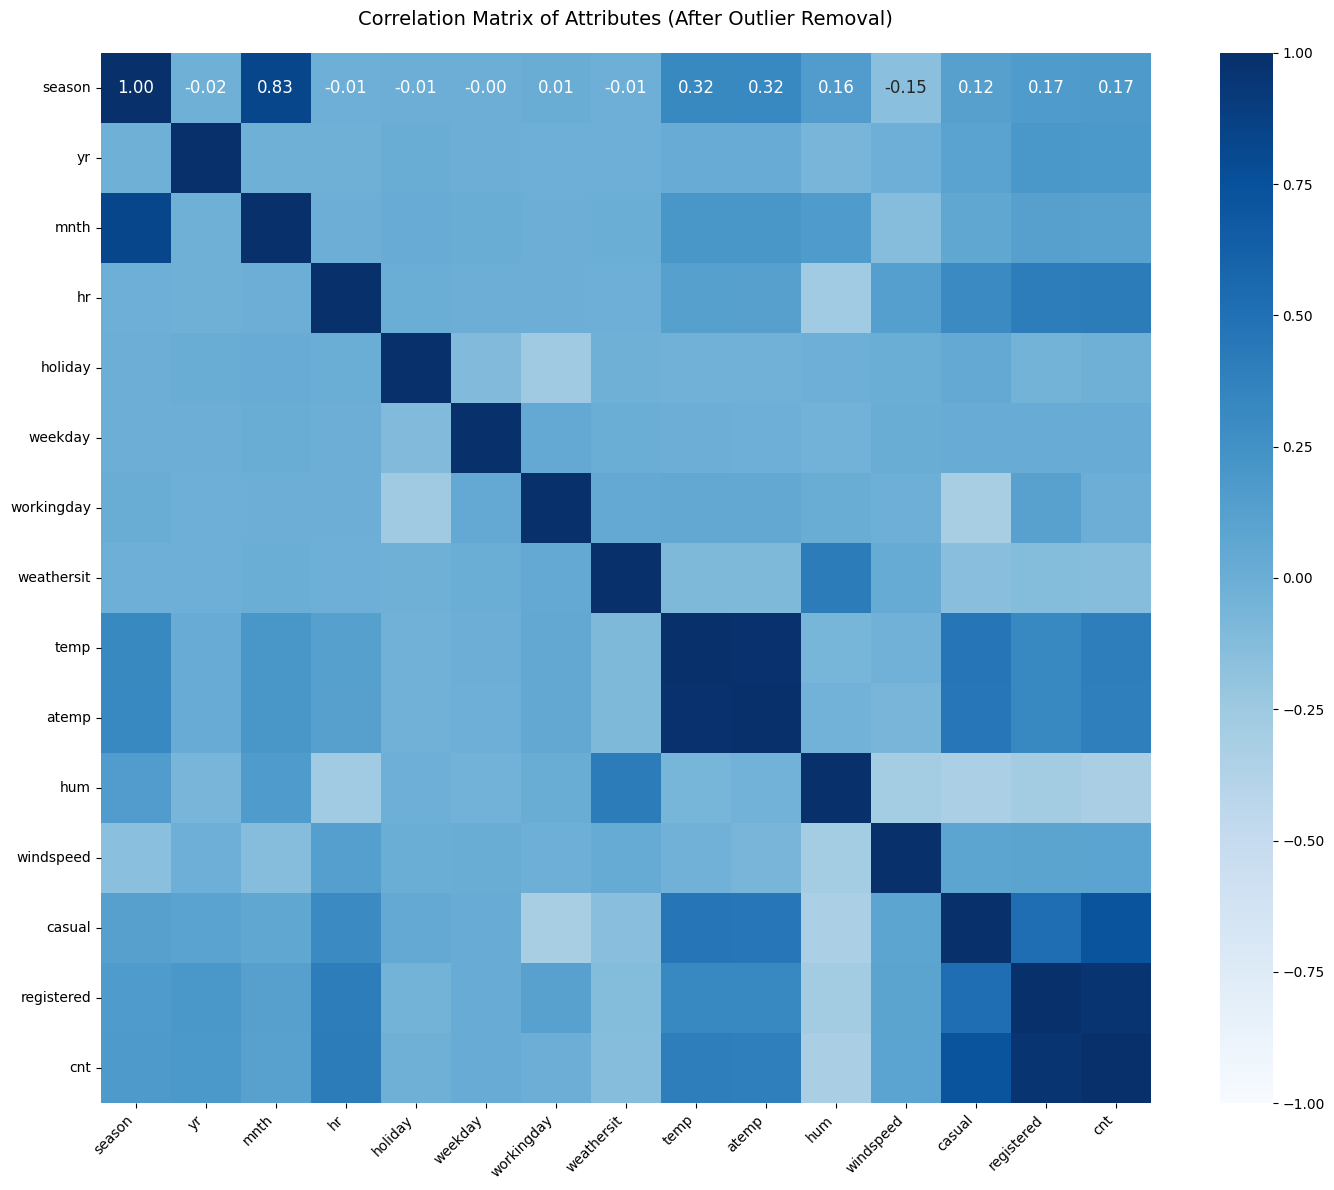

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correMtr = data_clean_corr.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    correMtr, annot=True, fmt='.2f', cmap='Blues',
    square=True, vmin=-1, vmax=1, annot_kws={'size': 12}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Attributes (After Outlier Removal)', pad=20, size=14)
plt.tight_layout()
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler
columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
data_clean[columnsToScale] = scaler.fit_transform(data_clean[columnsToScale])

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\4206269038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[columnsToScale] = scaler.fit_transform(data_clean[columnsToScale])


In [98]:
data_clean[columnsToScale].describe()

,temp,hum,windspeed
count,1.687400e+04,1.687400e+04,1.687400e+04
mean,-4.716178e-17,-3.031829e-17,9.685008e-18
std,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.455968e+00,-3.273264e+00,-1.548465e+00
25%,-7.931957e-01,-7.809804e-01,-6.950977e-01
50%,3.819061e-02,-2.141645e-03,-8.589927e-02
75%,7.656536e-01,8.286197e-01,5.232991e-01
max,2.636273e+00,1.918994e+00,5.398520e+00


Column Headers:

count: This shows the number of non-null values in each column. In this case, all three columns have 3 non-null values.
mean: This is the average value for each column. The values are very close to zero, suggesting the data might be centered around zero.
std: This represents the standard deviation, which measures the spread or variability of the data around the mean. The standard deviation for all columns is 1, indicating that the data is scaled or normalized.
min: This shows the minimum value observed in each column.
25%: This is the 25th percentile (first quartile), meaning 25% of the data points in each column fall below this value.
50%: This is the 50th percentile (median), representing the middle value of the data.
75%: This is the 75th percentile (third quartile), meaning 75% of the data points in each column fall below this value.
max: This shows the maximum value observed in each column.

In [100]:
#creating a new feature daycount
data_clean['dayCount'] = pd.Series(range(data_clean.shape[0]))/24

C:\Users\siyal\AppData\Local\Temp\ipykernel_8592\2168496964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['dayCount'] = pd.Series(range(data_clean.shape[0]))/24


In [104]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_clean, train_size=0.7)
train_set.sort_values('dayCount', axis=0, inplace= True)
test_set.sort_values('dayCount', axis=0, inplace= True)

In [105]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import xgboost

In [107]:
trainingCols= train_set.drop(['cnt'], axis=1)
trainingLabels= train_set['cnt']
lin_reg = LinearRegression()
dec_reg = DecisionTreeRegressor(random_state=42)

# Feature Analysis

In [108]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(dt_mse_scores)

Scores: [37.36886633 39.91109229 34.72650296 39.89923793 50.19136325 48.75952583
 58.63166808 44.17527519 43.10499577 57.46740051]
Mean: 45.42359281402808
Standard deviation: 7.74927956621195
Scores: [60.10250691 61.51065389 54.23266589 62.73497742 79.0308464  83.39582021
 89.75001504 70.27297085 72.47261739 85.25761629]
Mean: 71.87606902685711
Standard deviation: 11.516392140082017


These results provide insights into the model's performance in terms of its prediction accuracy. The MAE and RMSE scores, along with their means and standard deviations, help assess the model's average error and consistency across different folds. Lower MAE and RMSE values generally indicate better model performance

In [111]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(lr_mse_scores)

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan
Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan


C:\Users\siyal\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\siyal\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\siyal\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "C:\Users\siyal\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\siyal\anaconda3\Lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\siyal\anaconda3\Lib\site-packages\sklea

In [112]:
forest_reg = RandomForestRegressor()

rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(rf_mse_scores)

Scores: [31.97543993 30.24329946 27.90872142 28.7942083  33.10920406 32.20562235
 43.22198984 34.52408975 30.62495343 49.5953514 ]
Mean: 34.220287995489784
Standard deviation: 6.525866349252549
Scores: [43.62623631 45.6599302  42.70792134 46.80697454 54.1958954  50.23868464
 65.66742098 53.28924297 49.68653531 73.57739468]
Mean: 52.545623636699005
Standard deviation: 9.423218150170143


# Model Fine-Tuning: 

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [40,100,120,150], 'max_features':[8,10,12], 'max_depth':[15,28]}]

grid_search= GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [15, 28], 'max_features': [8, 10, 12],
                          'n_estimators': [40, 100, 120, 150]}],
             scoring='neg_mean_squared_error')

In [115]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 8, 'n_estimators': 120}

In [116]:
feature_importances = grid_search.best_estimator_
print(feature_importances)

RandomForestRegressor(max_depth=28, max_features=8, n_estimators=120)


In [122]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(bootstrap=True, 
                                    criterion='mse', 
                                    max_depth=28,
                                    max_features=10, 
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, 
                                    min_samples_leaf=1, 
                                    min_samples_split=2, 
                                    min_weight_fraction_leaf=0.0, 
                                    n_estimators=150,
                                    n_jobs=None, 
                                    oob_score=False, 
                                    random_state=None,
                                    verbose=0, 
                                    warm_start=False)

# Final Prediction:

In [129]:
#predicting values from test_set and evaluating model using RMSE error
test_set.sort_values(by='dayCount', axis=0, inplace=True)
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set[test_x_cols]
y_test = test_set[test_y_cols]

In [135]:
# Initialize your model with the correct criterion
final_model = RandomForestRegressor(criterion='squared_error')  # instead of 'mse'

# Fit the model
final_model.fit(trainingCols, trainingLabels)

# Make predictions and calculate RMSE as you were doing
test_set['predictedCounts_test'] = final_model.predict(X_test)
y_pred = test_set['predictedCounts_test']

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
final_mse = np.sqrt(mse)
print(final_mse)

39.010588015636166


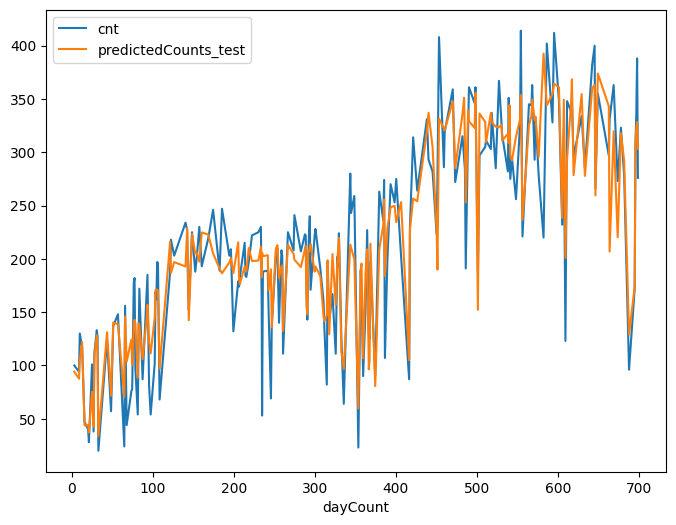

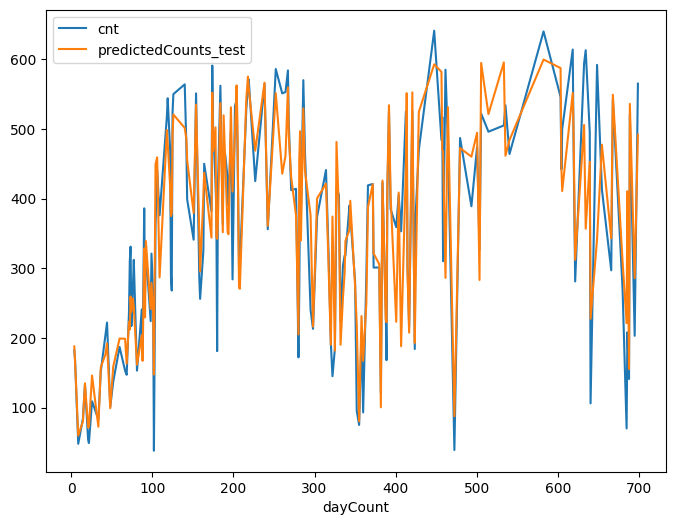

In [136]:
# finally visualizing models efficienc using line plot wrt time

times = [9,18]
for time in times:
      fig = plt.figure(figsize=(8, 6))
      fig.clf()
      ax = fig.gca()
      test_set_freg_time = test_set[test_set.hr == time]
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
      plt.show()

When your counts range from ~50 to 600, an average error of 39 units is relatively reasonable
It represents about 6-8% error on average, considering the full range of values
The model appears to be performing adequately, though there might be room for improvement in capturing extreme values